<a href="https://colab.research.google.com/github/royalshiv/MedicalChatBot/blob/master/07_Lab_Image_augmentation_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image augmentation

An operation that you will likely perform while feeding image data to a neural network is `image augemntation`, i.e.  creating sligtly and randomly modified versions of your images, which still look realistic. This is one of the key techniques which improve the neural network training process.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  our standard show_img function we have been using in almost every lesson so far
def show_img(im, ax=None, figsize=(8,8)):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3)
    ax.imshow(im[:,:,::-1]);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

## Download image from the Internet

The first task is to load the image, this time not from disk like we usually do, but directly from the Internet. The `URL` is given below. You will need to use the `requests` library just like we did in the `Intro to Jupyter` notebook, end then the `io` library, like we did in the web-app in Lecture 3.

In [ ]:
import requests
from io import BytesIO

In [ ]:
url = 'https://images.pexels.com/photos/257540/pexels-photo-257540.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260'

In the cell below download the image and decode it using `OpenCV` into the `im` variable. Shouldn't be more than 3 lines of code.

In [ ]:
#YOUR_CODE_HERE


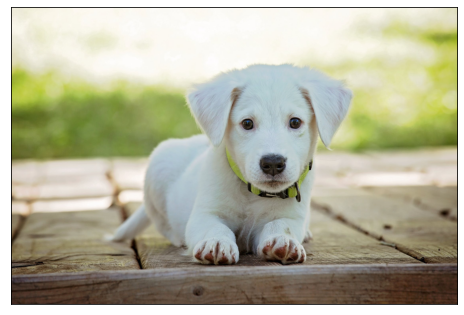

In [ ]:
show_img(im);

## Random augmentations

The thing that makes augmentations such a powerful technique, is their random nature. Each augmentation is applied randomly (i.e. sometimes it is applied, sometimes it isn't) and has randomised parameters (e.g. the rotation angle is different every time you randomly rotate the image). This effectively makes your training dataset *infinite* in a sense!

The function below applies the transformation given by `tfm` (which is a function) to the image given in `im` but only with probability `p`.

In [ ]:
def rand_tfm(im, tfm, p=0.5):
    if np.random.random() < p:
        im_copy = im.copy()
        return tfm(im_copy)
    return im

In [ ]:
def some_pointelss_tfm(im): return (0.5*im).astype(im.dtype)

Let's test it now - around half of the images `(p=0.5)` should become darker.

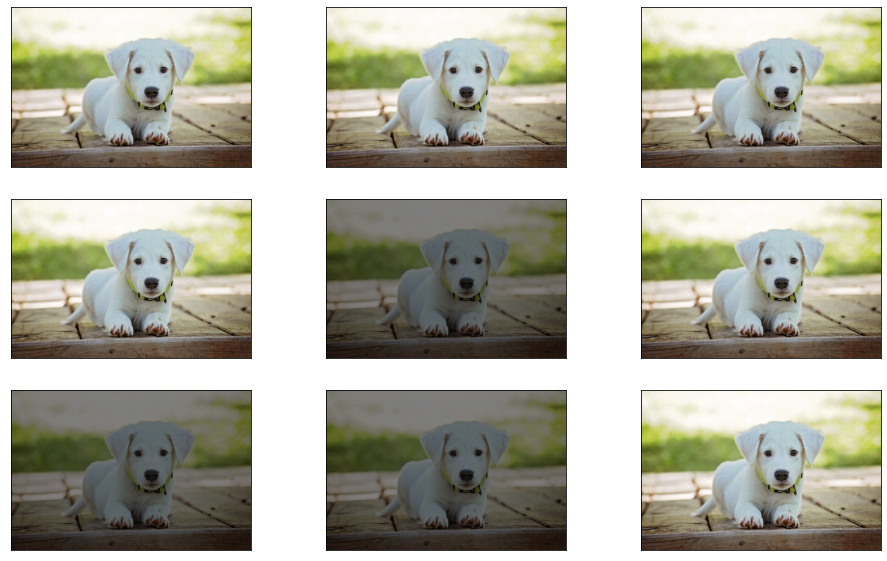

In [ ]:
_,ax = plt.subplots(3, 3, figsize=(16,10))
for ax_ in ax.flatten():
    im_tfm = rand_tfm(im, some_pointelss_tfm, p=0.5)
    show_img(im_tfm, ax_)

## Contrast and brightness

The cell below contains the contrast and brightness modification code we have used in the lectures.

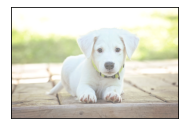

In [ ]:
alpha = 0.7   # contrast
beta = 100      # brightness
im_tfm = np.clip(alpha * im + beta, 0, 255).astype('uint8')
show_img(im_tfm, figsize=(3,3));

Create a function called `tfm_contrast(im, min_alpha, max_alpha)`, which randomly modifies contrast if image `im` by the amount between `min_alpha` (default value `0.6`) and `max_alpha` (default value `1.4`).

In [ ]:
#YOUR_CODE_HERE


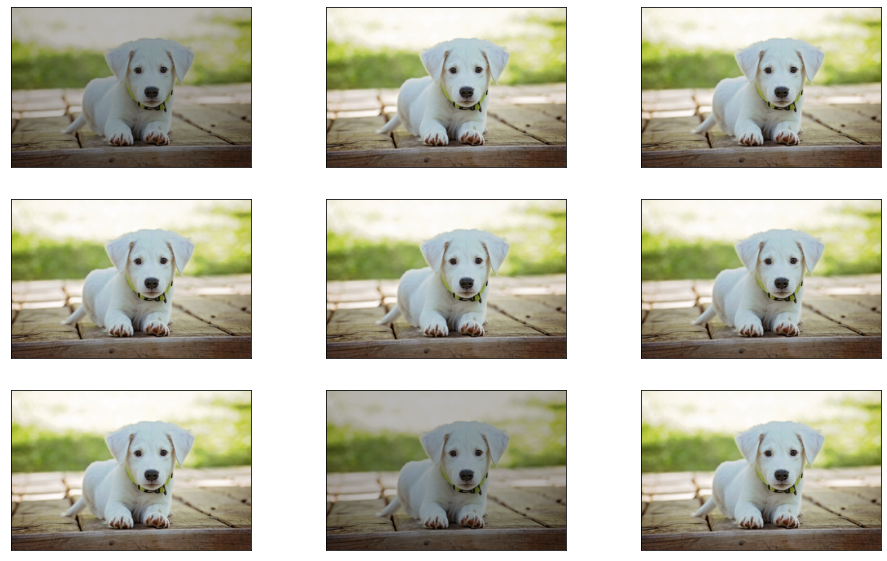

In [ ]:
_,ax = plt.subplots(3, 3, figsize=(16,10))
for ax_ in ax.flatten():
    im_tfm = rand_tfm(im, tfm_contrast, p=0.5)
    show_img(im_tfm, ax_)

It looks like we will be using the plotting code from the cell abiove a lot, so let's put it in a function called `plot_tfm(im, tfm, p=0.5)`.

In [ ]:
#YOUR_CODE_HERE


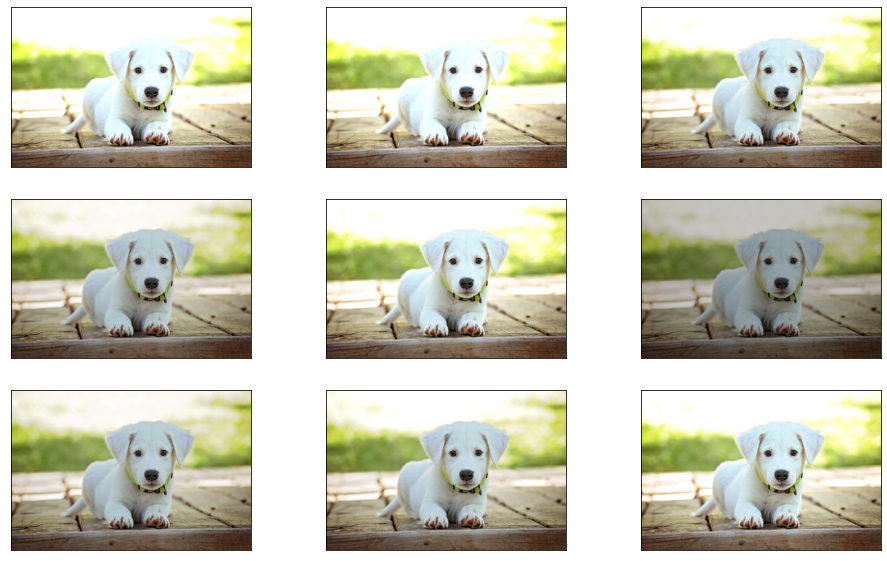

In [ ]:
# test it
plot_tfm(im, tfm_contrast, p=0.8)

## Flip

In the cell below create a function `tfm_fliplr(im)` which flips the image horizontally (i.e. left to right). Te body of the function is literally one line of code, using the `numpy` axis reversal trick - `::-1`.

In [ ]:
#YOUR_CODE_HERE


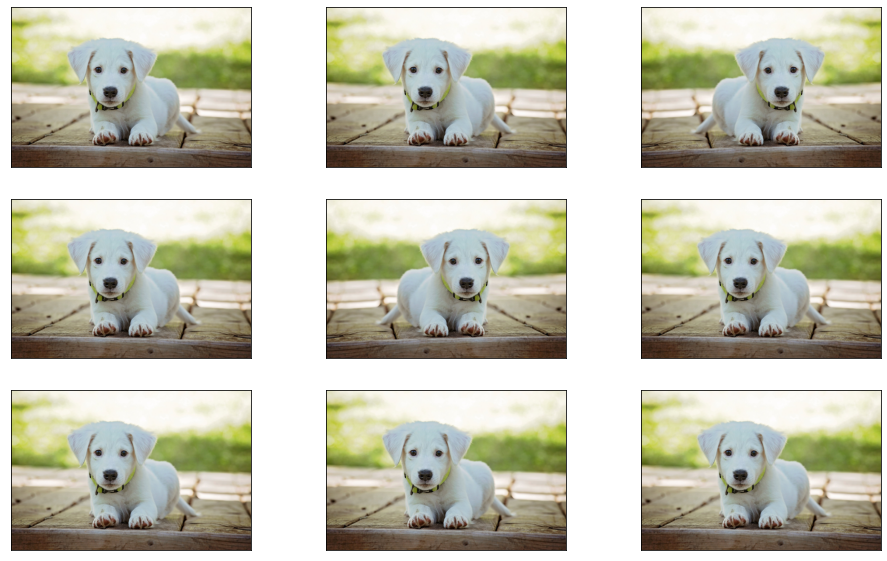

In [ ]:
# test it - some of the images should be mirrored around the vertical axis
plot_tfm(im, tfm_fliplr, p=0.7)

## Cropping

The image we are working with is quite big in terms of resolution:

In [ ]:
im.shape

(1500, 2250, 3)

In the cell below create function `tfm_crop(im, w, h)` which returns a random crop of dimensions `w, h`.

Hint: use the `np.random.randint()` function to get the `x,y` coordinates of the crop and then crop using the same approch as in the lesson on template matching for extracting image patches.

In [ ]:
#YOUR_CODE_HERE


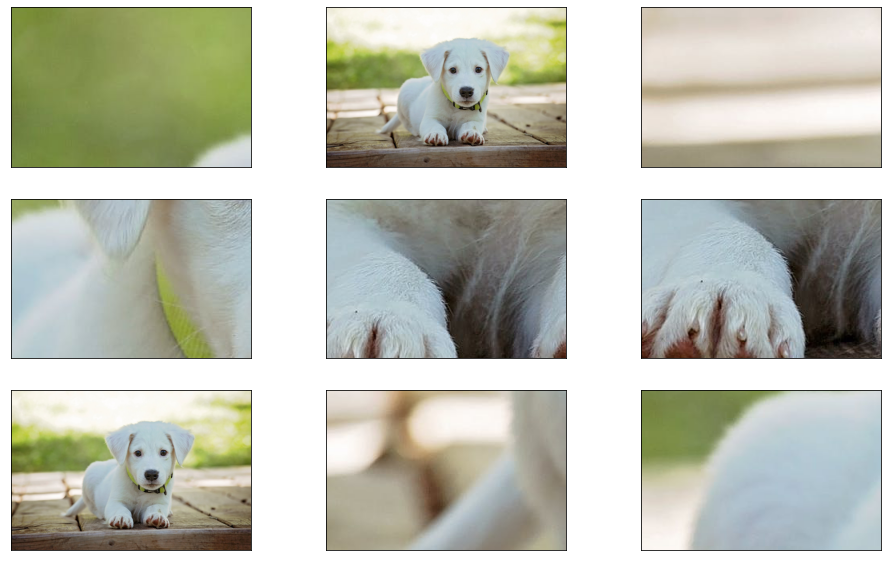

In [ ]:
# test it
plot_tfm(im, lambda x: tfm_crop(x,w=300,h=200), p=0.7)